<h2><a href="https://leetcode.com/problems/sort-items-by-groups-respecting-dependencies/?envType=study-plan-v2&envId=graph-theory">1203. Sort Items by Groups Respecting Dependencies</a></h2><h3>Hard</h3><hr><p>There are&nbsp;<code>n</code>&nbsp;items each&nbsp;belonging to zero or one of&nbsp;<code>m</code>&nbsp;groups where <code>group[i]</code>&nbsp;is the group that the <code>i</code>-th item belongs to and it&#39;s equal to <code>-1</code>&nbsp;if the <code>i</code>-th item belongs to no group. The items and the groups are zero indexed. A group can have no item belonging to it.</p>

<p>Return a sorted list of the items such that:</p>

<ul>
	<li>The items that belong to the same group are next to each other in the sorted list.</li>
	<li>There are some&nbsp;relations&nbsp;between these items where&nbsp;<code>beforeItems[i]</code>&nbsp;is a list containing all the items that should come before the&nbsp;<code>i</code>-th item in the sorted array (to the left of the&nbsp;<code>i</code>-th item).</li>
</ul>

<p>Return any solution if there is more than one solution and return an <strong>empty list</strong>&nbsp;if there is no solution.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2019/09/11/1359_ex1.png" style="width: 191px; height: 181px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 8, m = 2, group = [-1,-1,1,0,0,1,0,-1], beforeItems = [[],[6],[5],[6],[3,6],[],[],[]]
<strong>Output:</strong> [6,3,4,1,5,2,0,7]
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> n = 8, m = 2, group = [-1,-1,1,0,0,1,0,-1], beforeItems = [[],[6],[5],[6],[3],[],[4],[]]
<strong>Output:</strong> []
<strong>Explanation:</strong>&nbsp;This is the same as example 1 except that 4 needs to be before 6 in the sorted list.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= m &lt;= n &lt;= 3 * 10<sup>4</sup></code></li>
	<li><code>group.length == beforeItems.length == n</code></li>
	<li><code>-1 &lt;= group[i] &lt;= m - 1</code></li>
	<li><code>0 &lt;= beforeItems[i].length &lt;= n - 1</code></li>
	<li><code>0 &lt;= beforeItems[i][j] &lt;= n - 1</code></li>
	<li><code>i != beforeItems[i][j]</code></li>
	<li><code>beforeItems[i]&nbsp;</code>does not contain&nbsp;duplicates elements.</li>
</ul>


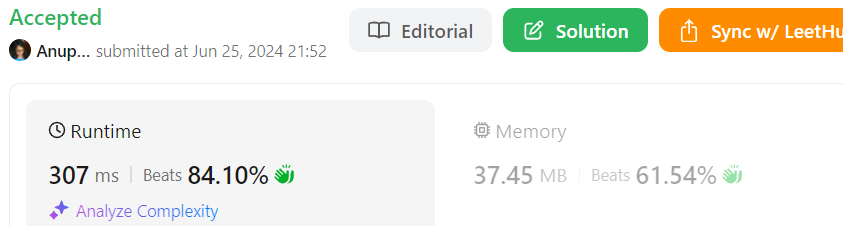

In [10]:
from collections import deque
class Solution:
    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        
        def topological_sort(graph, indegree):
            sorted_list = []
            queue = deque()

            for node in range(len(indegree)):
                if indegree[node] == 0:
                    queue.append(node)

            while queue:
                node = queue.pop()                # Instead of doing popleft, we just pop
                sorted_list.append(node)

                for item in graph[node]:
                    indegree[item] -= 1
                    if indegree[item] == 0:
                        queue.append(item)

            if len(sorted_list) == len(indegree):     # compare with the leneght of indegree => which will have number of nodes
                return sorted_list
            return []


        maxgroup_id = max(group)
        for i in range(len(group)):               # Assign nodes to single member group for each node with group id as -1
            if group[i] == -1:
                maxgroup_id += 1
                group[i] = maxgroup_id

        group_graph = defaultdict(list)
        group_indegree = [0]* (maxgroup_id + 1)
        item_graph = defaultdict(list)
        item_indegree = [0]* n

        for i in range(n):                                 # Create group_graph , taking connections from group of  beforeItems
            for before in beforeItems[i]:                 # group of before items will come before the group of others 
                if group[i] != group[before]:
                    group_graph[group[before]].append(group[i])
                    group_indegree[group[i]] += 1
                else:
                    item_graph[before].append(i)             # simsilary create item graph and update indegrees
                    item_indegree[i] += 1

        # print(f"group_graph : {group_graph}")
        # print(f"item_graph : {item_graph}")


        sorted_group_ids = topological_sort(group_graph, group_indegree)     # sort both groups and item graph
        sorted_item_ids = topological_sort(item_graph, item_indegree)

        # print(f"sorted_group_ids : {sorted_group_ids}")
        # print(f"sorted_item_ids : {sorted_item_ids}")

        if not sorted_group_ids or not sorted_item_ids:
            return []

        group_to_items_map = defaultdict(list)                     # create a map. with with group as key for each sorted items,                                                   
        for item_id in sorted_item_ids:                          # and hence the values of each key(or group id) will be in sorted order
            group_to_items_map[group[item_id]].append(item_id)

        # print(f"group_to_items_map: {group_to_items_map}")

        result = []
        for group_id in sorted_group_ids:       # now iterate through sorted group and just print thier values as it is using the map
            result += group_to_items_map[group_id]                           

        return result
